# Traitement du Signal - TP6 : Voyage dans le monde numérique !

Durant les derniers TP, nous avons exploré le traitement du signal en faisant le lien avec tout ce que vous avez vu en analogique. Aujourd'hui, nous allons découvrir le magnifique monde du numérique. Alors, oui, on faisait du numérique depuis le début. Mais on va reprendre la base du signal, et comprendre les effets de la numérisation. Enfin, durant les prochaines séances, on reverra une bonne partie de ce qu'on a vu précédemment en analysant plus précisément l'impact de la numérisation sur les résultats obtenus. Car oui, le numérique, c'est le monde réel. Et le monde réel, il ne fait pas de cadeau...

In [1]:
# A COMPLETER
# Import des librairies
import numpy as np
from matplotlib import pyplot as plt

## Exercice 1 : Echantillonnage

Durant les précédents TPs, on a toujours parlé de fréquence et de temps d'échantillonnage. On sait globalement qu'une grande fréquence (ou un petit temps) signifie qu'on a plus de points. Super... Mais on va aller un petit peu plus loin.

Reprenez la fonction *somme_sinus* du TP précédent, et modifiez la pour prendre en entrée avec les paramètres des sinus, non pas un axe temporel, mais une fréquence d'échantillonnage $f_e$ et un temps maximum $T$ (le signal évoluant de 0 à $T$ secondes). La fonction renverra l'axe temporel et le signal $s(t)$ créé.

In [2]:
# A COMPLETER
# Modification de la fonction somme_sinus

def somme_sinus(parameters,T,fe):
    """
    Construit un signal représentant une somme de sinus
    parameters: liste [frequence, amplitude, phase], contenant les paramètres de chaque sinus à intégrer dans la somme
    T: entier/float, le temps maximum d'évolution du signal
    fe : entier/float, la fréquence d'échantillonnage du signal
    """
    # Création de l'axe temporel
    temps = np.arange(0,T,1/fe)
    
    # Initialisation du signal
    signal = np.zeros_like(temps)
    
    # On itère sur la liste de paramètres
    for p in parameters:
        freq, amp, phase = p
        signal+= amp*np.sin(2*np.pi*freq*temps + phase)
    return temps, signal

Créez le signal $s(t)$ suivant, évoluant de 0 à 1 secondes avec une fréquence d'échantillonnage de $2048$ Hz :

\begin{equation*}
    s(t) = sin(2 \pi f_0 t)
\end{equation*}

Avec ici, $f_0 = 12$ Hz

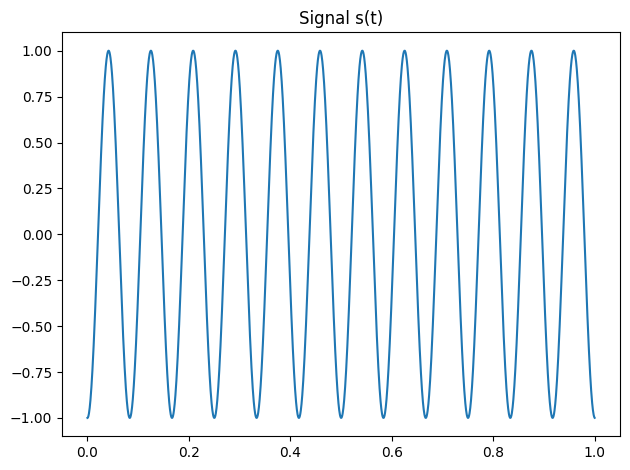

In [3]:
# A COMPLETER
# Création et affichage de s(t)

parameters_s = [[12, 1, -np.pi/2]]

t,s = somme_sinus(parameters_s, 1, 2048)

# Affichage du signal
plt.figure()
plt.plot(t, s)
plt.title("Signal s(t)")
plt.tight_layout()
plt.show()

**_QUESTION :_** En théorie, à partir de quelle valeur de fréquence d'échantillonnage le signal perdra de l'information ?

**_REPONSE :_** Afin que le signal n'ait aucune perte d'information, il faut respecter le théorème de Shannon. Le signal perdra donc de l'information si la fréquence d'échantillonnage $f_e$ est inférieure au double de la fréquence maximum du signal $f_{max}$. Ici, notre signal est une simple sinusoïde de fréquence 12 Hz. Donc la perte d'information se fera si $f_e$ est inférieure à 24 Hz.

Maintenant, tracez plusieurs figures du même signal constuit, mais en divisant successivement la fréquence d'échantillonnage par 2, jusqu'à obtenir $f_e = 16$ Hz.

**_QUESTIONS :_** 
- A partir de quel fréquence d'échantillonnage le signal est-il visuellement dégradé ?
- A partir de quel fréquence d'échantillonnage le signal n'est plus reconnaissable ? C'est-à-dire, à quel moment le signal perd sa fréquence originale ?

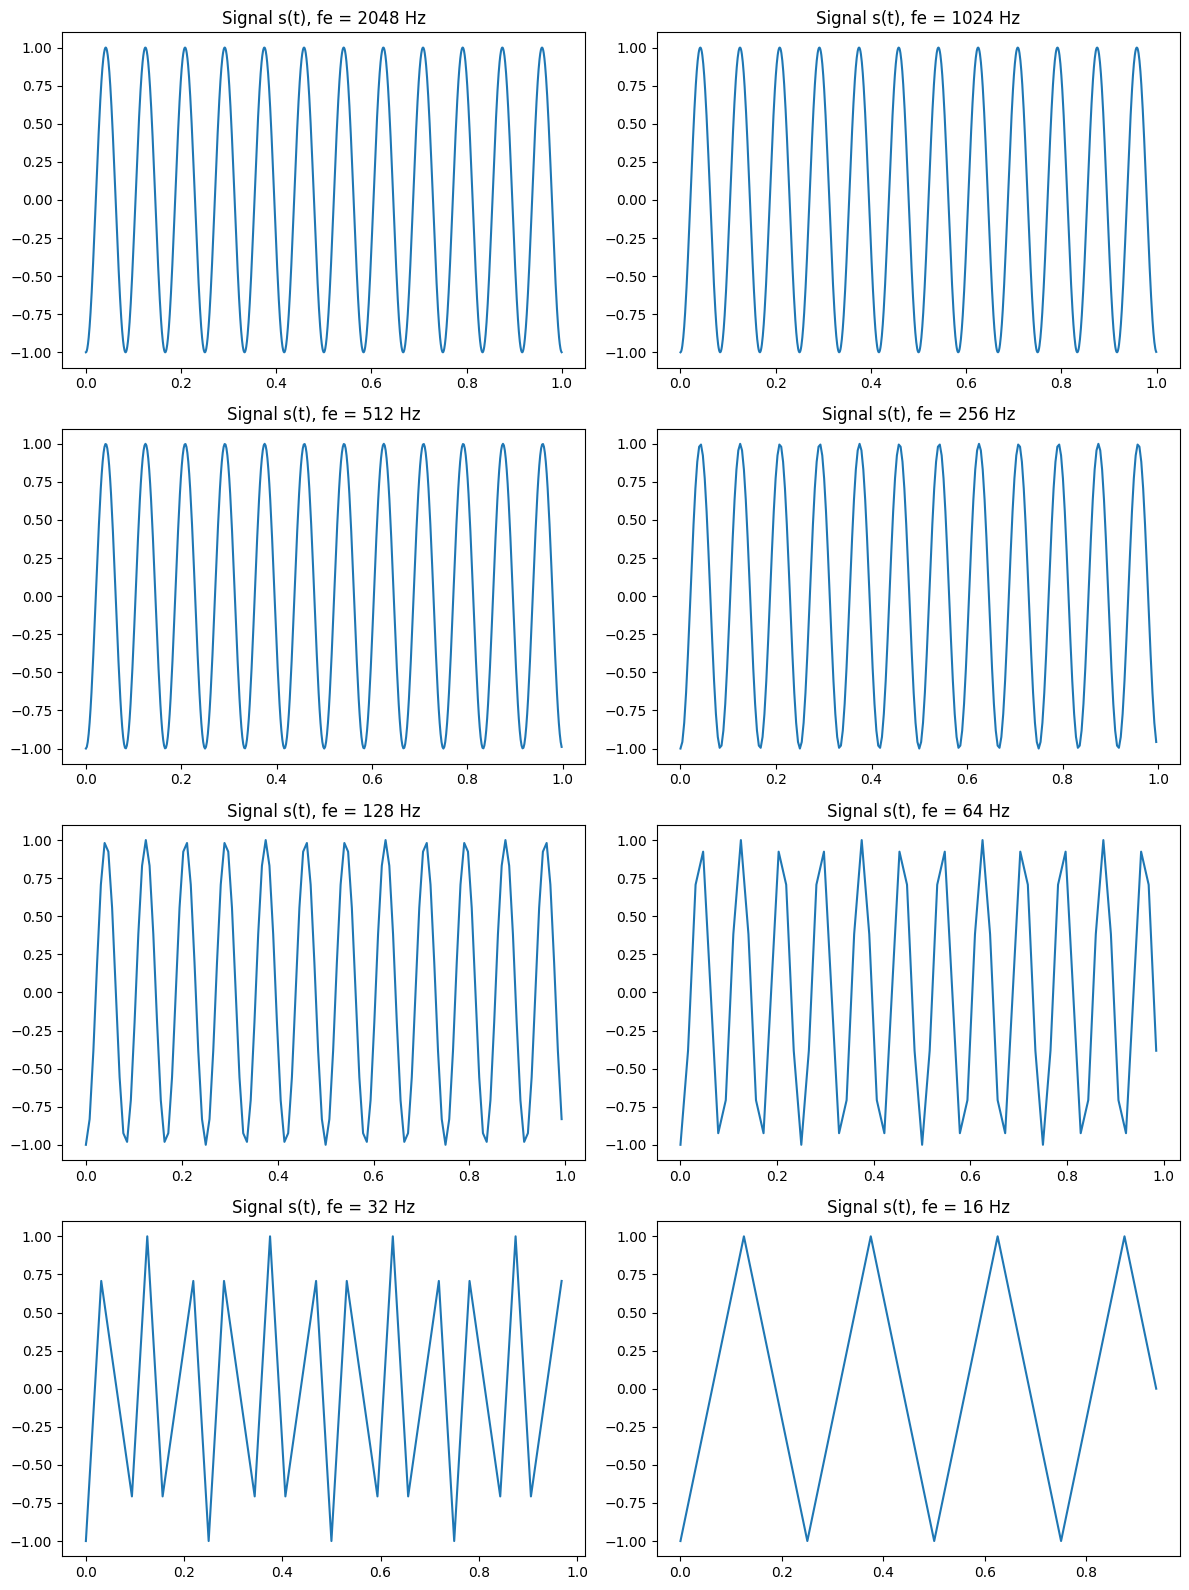

In [4]:
# A COMPLETER
# Visualisation de s(t) à différentes fréquences d'échantillonnage

K = 8 
fe_init = 2048 # Fréquence d'échantillonnage initiale
T = 1 # Temps d'évolution du signal en secondes

plt.subplots(K//2,2,figsize=(12,16))
for i in range(K):
    fe =  fe_init//(2**i)
    t,s = somme_sinus(parameters_s, T, fe)

    plt.subplot(K//2,2,i+1)
    plt.plot(t, s)
    plt.title(f"Signal s(t), fe = {fe} Hz")
plt.tight_layout()
plt.show()

**_REPONSE :_** 
- On voit qu'à partir de $f_e = 128$ Hz, le signal est moins précis (on ne voit plus les arrondis de la sinusoide).
- A partir de $f_e = 16$ Hz, on remarque encore la forme sinusoïdale, mais la fréquence du signal n'est plus de 12 Hz. 

Reprenez le code précédent et affichez cette fois ci, pour chaque fréquence d'échantillonnage, le spectre d'amplitude de la transformée de Fourier du signal échantillonné. Affichez également la position des pics trouvés en fréquentiel (via *scipy.signal.find_peaks*, comme dans le TP3 partie 2).

*Note : Attention, ici, je veux une transformée de Fourier classique, pas réelle*

fe = 2048 hz : [-12.0, 12.0]
fe = 1024 hz : [-12.0, 12.0]
fe = 512 hz : [-12.0, 12.0]
fe = 256 hz : [-12.0, 12.0]
fe = 128 hz : [-12.0, 12.0]
fe = 64 hz : [-12.0, 12.0]
fe = 32 hz : [-12.0, 12.0]
fe = 16 hz : [-4.0, 4.0]


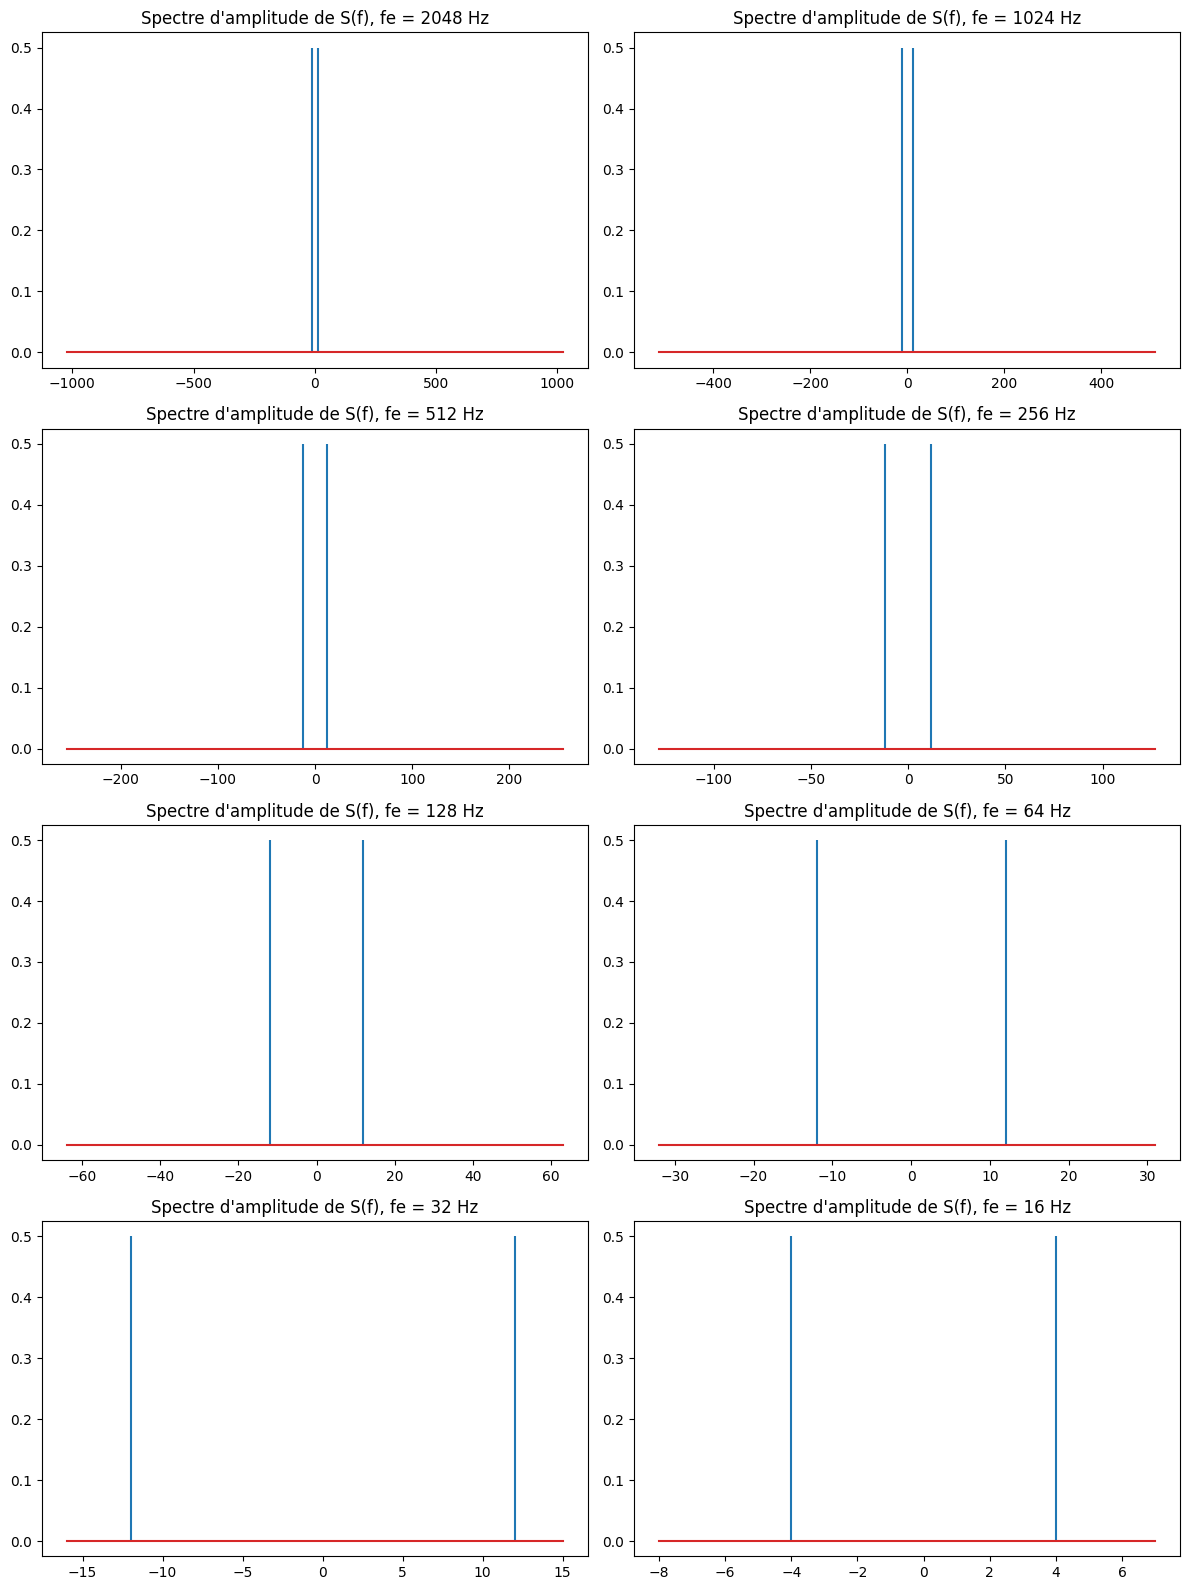

In [5]:
# A COMPLETER
# Visualisation des spectres d'amplitude de s(t) à différentes fréquences d'échantillonnage
from scipy.signal import find_peaks

K = 8 
fe_init = 2048 # Fréquence d'échantillonnage initiale
T = 1 # Temps d'évolution du signal en secondes

plt.subplots(K//2,2,figsize=(12,16))
for i in range(K):
    fe =  fe_init//(2**i)
    t,s = somme_sinus(parameters_s, T, fe)
    S = np.fft.fftshift(np.fft.fft(s))
    f = np.fft.fftshift(np.fft.fftfreq(len(s),1/fe))
    amp = np.abs(S)*1/len(s)


    plt.subplot(K//2,2,i+1)
    plt.stem(f, amp, markerfmt=' ')
    plt.title(f"Spectre d'amplitude de S(f), fe = {fe} Hz")

    peaks, properties = find_peaks(amp, height=np.max(amp)*0.01)
    print(f'fe = {fe} hz : {[float(f[p]) for p in peaks]}')

plt.tight_layout()
plt.show()

Avant de passer à la suite, on va regarder bien en détail les différents résultats de FFT.

**_QUESTION :_** Quelle est la plage de fréquence analysée pour chaque fréquence d'échantillonnage ? A quoi cela correspond ?

**_REPONSE :_** Pour une fréquence d'échantillonnage $f_e$, la plage de fréquence étudiée va de $-\frac{f_e}{2}$ à $\frac{f_e}{2}$

**_QUESTION :_** Quelle est la précision spectrale pour chaque fréquence d'échantillonnage ? *(c'est-à-dire l'écart entre 2 fréquences analysées après Transformée de Fourier)*

**_REPONSE :_** La précision spectrale se définit par $\frac{f_e}{N}$ avec $f_e$ la fréquence d'échantillonnage, et $N$ le nombre de points temporels. Ici, quelque soit la fréquence d'échantillonnage, le signal évolue toujours sur $T = 1s$. Le nombre de points $N$ est donc $T \times f_e$. La précision spectrale est donc également de $\frac{1}{T}$, ce qui fait qu'elle est constante quelque soit la fréquence d'échantillonnage dans notre cas.

**_QUESTION :_** A partir de quelle fréquence d'échantillonnage la TF du signal ne correspond plus à l'original ?

**_REPONSE :_** A $f_e = 16$ Hz, on a une TF incorrecte, avec des pics d'amplitude 0.5 mais à -4 et 4 Hz.

**_QUESTION :_** Comment s'explique ce résultat ? *(cf. Exercice 5-d de TD)*

**_REPONSE :_** A $f_e = 16$ Hz, la condition de Shannon n'est plus respectée, et la TF du signal se situe donc dans la plage de fréquences de -8 à 8 Hz, ce qui explique que les pics ne situent pas à ± 12 Hz. Les deux pics trouvés à ± 4 Hz s'expliquent par la nature de la transformée de Fourier discrète. La TF du signal est **périodique** de fréquence 16 Hz. Le pic à -4 Hz correspond alors au pic à 12 Hz - 16 Hz, et inversement pour le pic à 4 Hz. Si on étendait la TF, on pourrait alors voir les pics à 12 et -12 Hz.

On va maintenant reconstruire les signaux échantillonnés à $f_e$ < 2048 Hz pour les replacer à une fréquence d'échantillonnage de 2048 Hz, afin d'améliorer leur qualité. Pour ce faire, on va faire un zero-padding de la transformée de Fourier (ce sera expliqué plus en détail lors du prochain TP). Votre TF de taille $N$ va être augmentée pour être de taille $N'$ en rajoutant des 0 à droite et à gauche.

**_QUESTION :_** Avec *s(t)* évoluant durant 1 seconde, quelle est la valeur de $N$, la taille du vecteur après transformée de Fourier, en fonction de la fréquence d'échantillonnage $f_e$ ?

**_REPONSE :_** Le nombre de points $N$ est égal à $T \times f_e$, ce qui fait qu'ici, $N = f_e$.

**_QUESTION :_** Quelle doit être donc la taille $N'$ du vecteur augmenté pour qu'après transformée de Fourier inverse, le signal ait une fréquence d'échantillonnage $f_e'$ = 2048 Hz ?

**_REPONSE :_** Il faut donc que $N$ = 2048 pour obtenir $f_e'$ = 2048 Hz.

Reprenez votre code précédent, et modifiez le pour faire un zero-padding centré afin d'augmenter la taille de la TF, puis faites une transformée de Fourier inverse et affichez le résultat final pour chacun des signaux.

*Note : Attention, le fait d'agrandir le vecteur fait qu'il faut corriger la normalisation de l'amplitude*

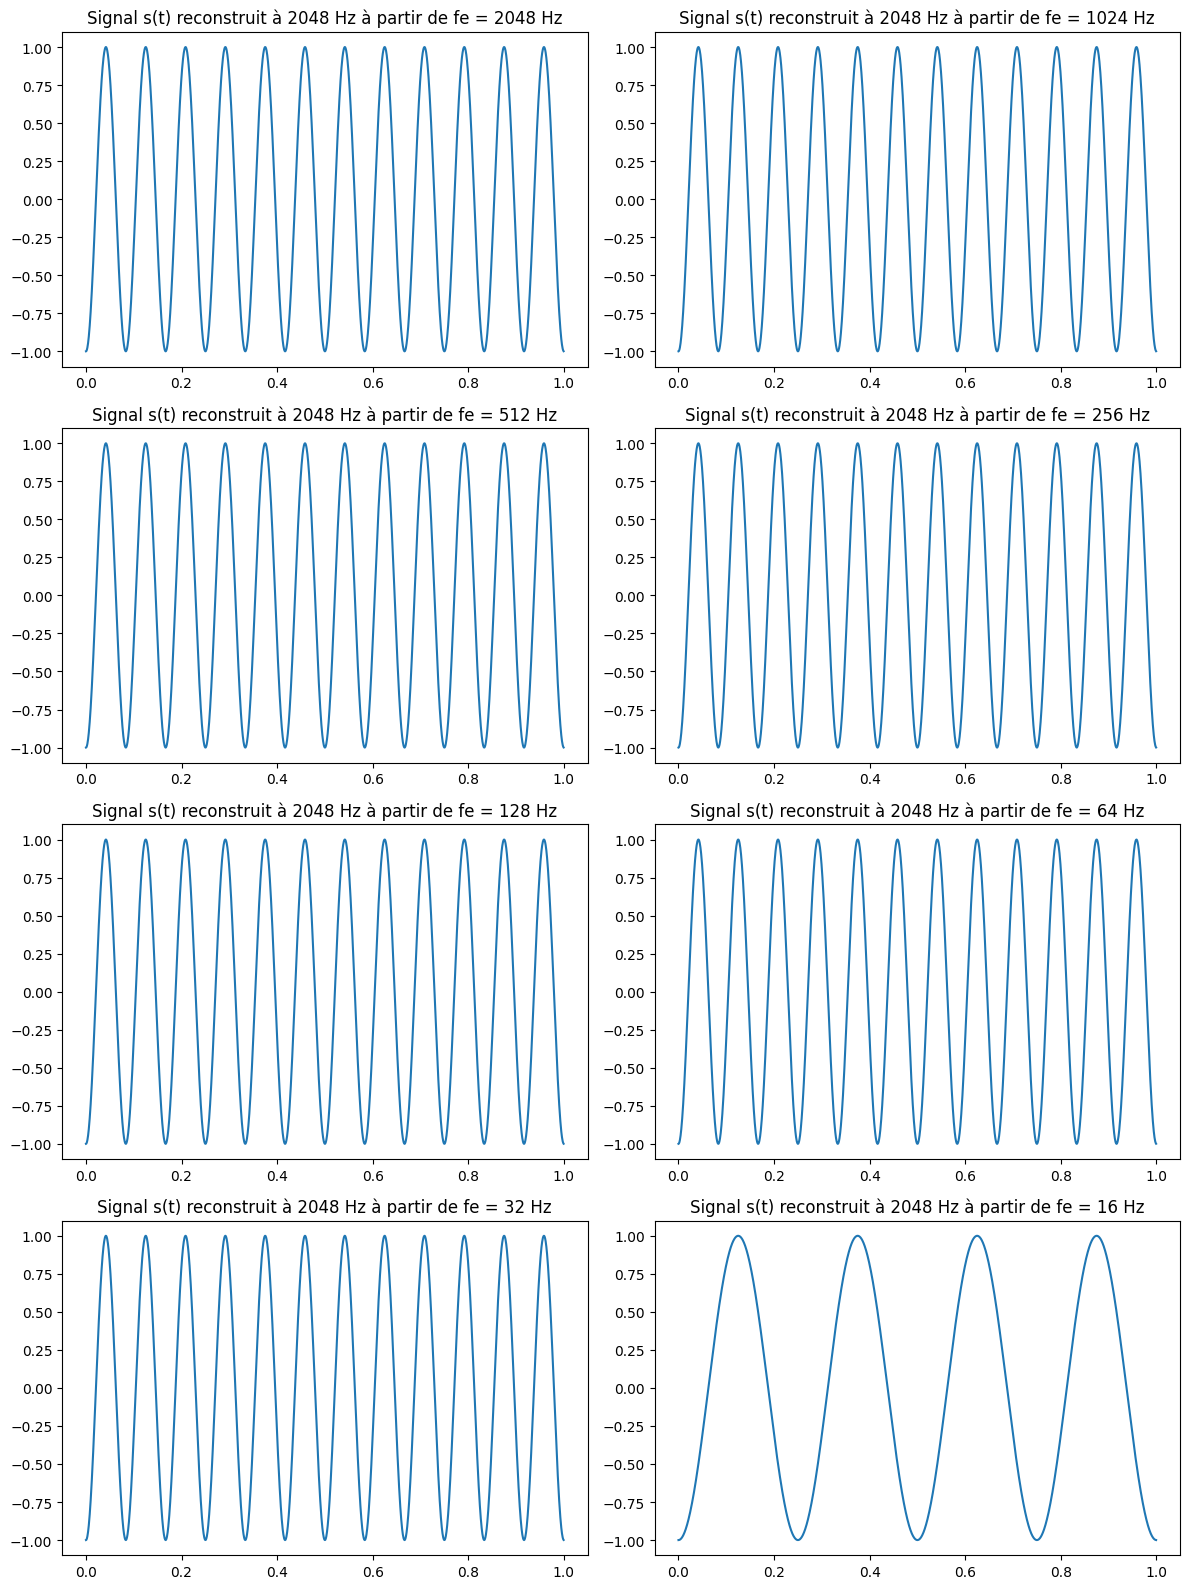

In [6]:
# A COMPLETER
# Reconstruction de s(t) à différentes fréquences d'échantillonnage pour obtenir fe' = 2048 Hz

K = 8 
fe_init = 2048 # Fréquence d'échantillonnage initiale
T = 1 # Temps d'évolution du signal en secondes
N_prime = fe_init*T # Nombre de points à avoir après zero-padding

plt.subplots(K//2,2,figsize=(12,16))
for i in range(K):

    fe =  fe_init//(2**i)
    t, s = somme_sinus(parameters_s, T, fe)
    S = np.fft.fftshift(np.fft.fft(s))
    f = np.fft.fftshift(np.fft.fftfreq(len(s),1/fe))
    
    # Zero-padding centré
    N = len(s) # Nombre de points de la TF du signal
    S_pad = np.pad(S,((N_prime-N)//2,(N_prime-N)//2),constant_values=(0,0))
    
    # Correction de l'amplitude
    S_pad *= N_prime/N

    # TF inverse (attention à ne pas oublier ifftshift !)
    s_ = np.fft.ifft(np.fft.ifftshift(S_pad))
    
    # Affichage du résultat
    plt.subplot(K//2,2,i+1)
    # Ici, on définit l'axe temporel t_2048, allant de 0 à 1 secondes avec fe = 2048 Hz
    t_2048 = np.arange(0,1,1/2048)
    plt.plot(t_2048, np.real(s_))
    plt.title(f"Signal s(t) reconstruit à 2048 Hz à partir de fe = {fe} Hz")
plt.tight_layout()
plt.show()

**_QUESTION :_** Que donne la reconstruction ?

**_REPONSE :_** Pour $f_e$ > 24 Hz, la condition de Shannon, la reconstruction est parfaite, on retrouve bien la sinusoïde originale. Pour $f_e$ = 16 Hz, on obtient également une sinusoïde, mais de 4 Hz, donc la reconstruction n'est pas possible.

---

**Commentaire sur l'exercice :**

Ici, vous avez un exemple de reconstruction parfaite, pour montrer que cela est théoriquement possible. Les paramètres ont été vigoureusement choisi pour que cela soit faisable. En pratique, on obtient rarement une reconstruction parfaite, notamment en fonction de la transformée de Fourier effectuée. Donc oui, c'est théoriquement réalisable, mais ce n'est pas toujours le cas.


---

## Exercice 2 : Et 1, et 2, et 3 sinus !

Un exercice dans la continuité du précédent, puisqu'on va reprendre le même principe mais avec des signaux étant des combinaisons linéaires de cosinusoïdes. L'exercice suit également l'exercice 5.d réalisé en TD, ce qui permet justement de visualiser les différents résultats du signal selon la fréquence d'échantillonnage $f_e$ et la fréquence de coupure $f_c$ d'un filtre passe-bas idéal faisant office de filtre passe-bas anti-repliement.

Construisez le signal $x(t)$, la combinaison linéaire de signal cosinusoïdal de fréquence 300 Hz, 400 Hz, 1.3 kHz et 3.6 kHz. Chaque amplitude de signal est de 1, et $x(t)$ évoluera durant 1 seconde à une fréquence d'échantillonnage $f_e$ = 2 kHz.

*Note : Attention, ce sont des cosinus ici, pas des sinus !*

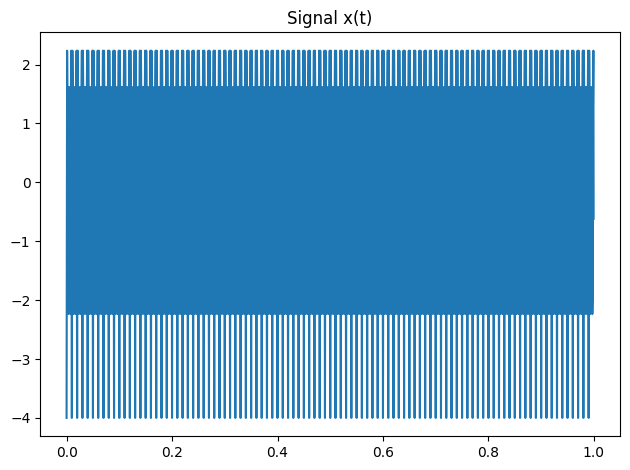

In [7]:
# A COMPLETER
# Construction et affichage du signal x(t)

fe = 2000
T = 1
parameters_x = [[300,1,-np.pi/2],
                [400,1,-np.pi/2],
                [1300,1,-np.pi/2],
                [3600,1,-np.pi/2]]

t,x = somme_sinus(parameters_x, T, fe)

# Affichage du signal
plt.figure()
plt.plot(t, x)
plt.title("Signal x(t)")
plt.tight_layout()
plt.show()

Calculez maintenant la transformée de Fourier et affichez le spectre d'amplitude normalisé.

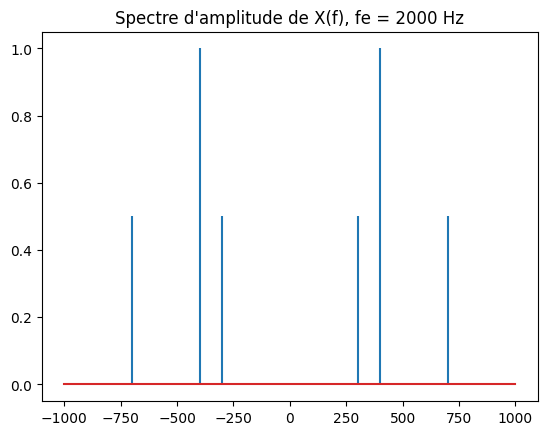

In [8]:
# A COMPLETER
# Transformée de Fourier de x(t) et affichage du spectre d'amplitude
X = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(len(x),1/fe))
amp = np.abs(X)*1/len(x)

plt.stem(f, amp, markerfmt=' ')
plt.title(f"Spectre d'amplitude de X(f), fe = {fe} Hz")
plt.show()

Détectez les différents pics obtenus sur la TF, ainsi que leur amplitude.

In [9]:
# A COMPLETER
# Détection des pics et de leur amplitude
peaks, properties = find_peaks(amp, height=np.max(amp)*0.01)
print(f'Pics détectés: ')
for peak, height in zip(peaks, properties['peak_heights']):
    print(f"• {f[peak]} Hz - Amplitude {height}")

Pics détectés: 
• -700.0 Hz - Amplitude 0.5000000000000009
• -400.0 Hz - Amplitude 1.000000000000002
• -300.0 Hz - Amplitude 0.5000000000000033
• 300.0 Hz - Amplitude 0.5000000000000033
• 400.0 Hz - Amplitude 1.000000000000002
• 700.0 Hz - Amplitude 0.5000000000000009


Appliquez maintenant un filtre passe-bas anti-repliement sur votre TF avec une fréquence de coupure $f_c$ = 900 Hz, et affichez le spectre d'amplitude.

*Note : Si vous reprenez les filtres faits durant le TP5, attention car c'était réalisé en TF réelle, ce qui n'est pas le cas ici...*

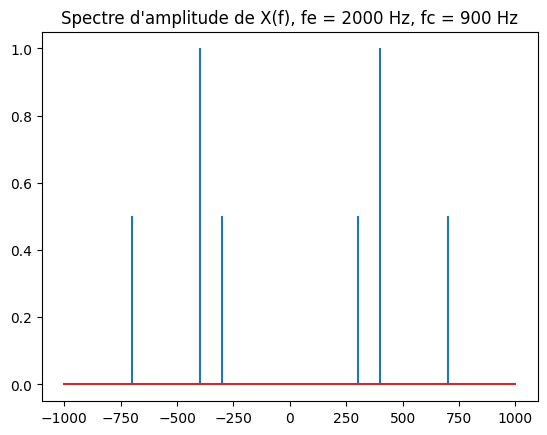

Pics détectés: 
• -700.0 Hz - Amplitude 0.5000000000000009
• -400.0 Hz - Amplitude 1.000000000000002
• -300.0 Hz - Amplitude 0.5000000000000033
• 300.0 Hz - Amplitude 0.5000000000000033
• 400.0 Hz - Amplitude 1.000000000000002
• 700.0 Hz - Amplitude 0.5000000000000009


In [10]:
# A COMPLETER
# Filtre passe-bas anti-repliement appliqué à x(t), affichage du spectre d'amplitude modifié et détection des pics (fréquence, amplitude)
fc = 900
X[np.abs(f)>fc]=0

amp = np.abs(X)*1/len(x)
plt.stem(f, amp, markerfmt=' ')
plt.title(f"Spectre d'amplitude de X(f), fe = {fe} Hz, fc = {fc} Hz")
plt.show()

peaks, properties = find_peaks(amp, height=np.max(amp)*0.01)
print(f'Pics détectés: ')
for peak, height in zip(peaks, properties['peak_heights']):
    print(f"• {f[peak]} Hz - Amplitude {height}")

**_QUESTION :_** Est-ce que le résultat obtenu correspond à la théorie ? 

**_REPONSE :_** Oui ! On avait exactement trouvé ce résultat, avec 3 fréquences (300, 400 et 700 hz), et avec le pic à 400 Hz plus grand que les deux autres car correspondant à l'amplitude des cosinus à fréquence 400 Hz et 3.6 kHz.

Répétez maintenant toutes les opérations de cet exercice, mais avec :
- $f_e$ = 2 kHz et $f_c$ = 1500 Hz
- $f_e$ = 4 kHz et $f_c$ = 500 Hz

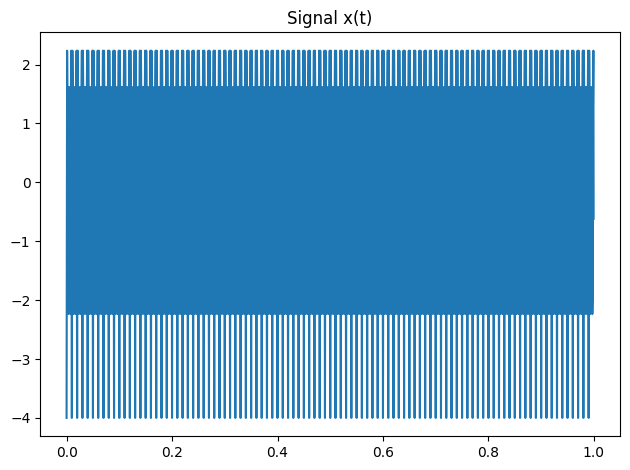

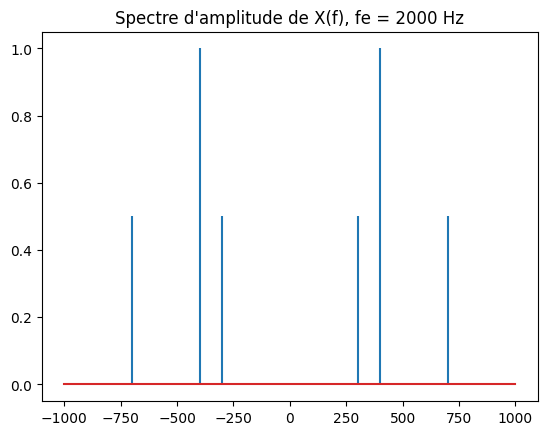

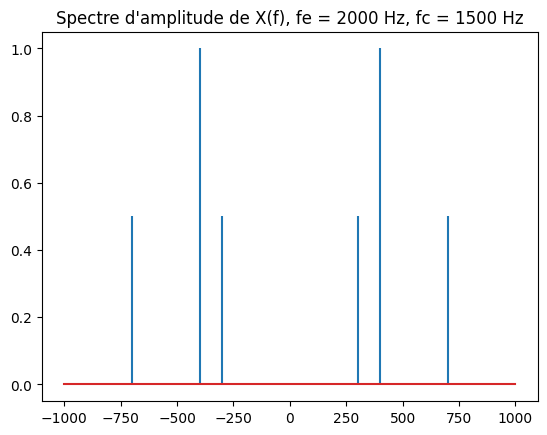

Pics détectés: 
• -700.0 Hz - Amplitude 0.5000000000000009
• -400.0 Hz - Amplitude 1.000000000000002
• -300.0 Hz - Amplitude 0.5000000000000033
• 300.0 Hz - Amplitude 0.5000000000000033
• 400.0 Hz - Amplitude 1.000000000000002
• 700.0 Hz - Amplitude 0.5000000000000009


In [11]:
# A COMPLETER
# Mêmes opérations mais avec fe = 2kHz et fc = 1500 Hz

fe = 2000
fc = 1500

T = 1
parameters_x = [[300,1,-np.pi/2],
                [400,1,-np.pi/2],
                [1300,1,-np.pi/2],
                [3600,1,-np.pi/2]]

t,x = somme_sinus(parameters_x, T, fe)

# Affichage du signal
plt.figure()
plt.plot(t, x)
plt.title("Signal x(t)")
plt.tight_layout()
plt.show()

# Transformée de Fourier de x(t) et affichage du spectre d'amplitude
X = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(len(x),1/fe))
amp = np.abs(X)*1/len(x)

plt.stem(f, amp, markerfmt=' ')
plt.title(f"Spectre d'amplitude de X(f), fe = {fe} Hz")
plt.show()

# Filtre passe-bas idéal appliqué à x(t), affichage du spectre d'amplitude modifié et détection des pics (fréquence, amplitude)
X[np.abs(f)>fc]=0

amp = np.abs(X)*1/len(x)
plt.stem(f, amp, markerfmt=' ')
plt.title(f"Spectre d'amplitude de X(f), fe = {fe} Hz, fc = {fc} Hz")
plt.show()

peaks, properties = find_peaks(amp, height=np.max(amp)*0.01)
print(f'Pics détectés: ')
for peak, height in zip(peaks, properties['peak_heights']):
    print(f"• {f[peak]} Hz - Amplitude {height}")

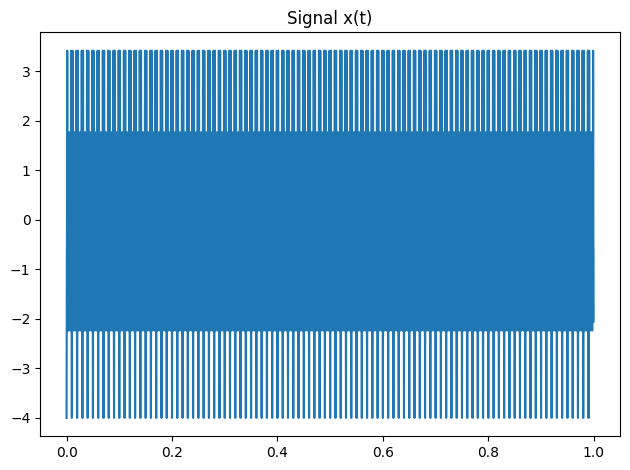

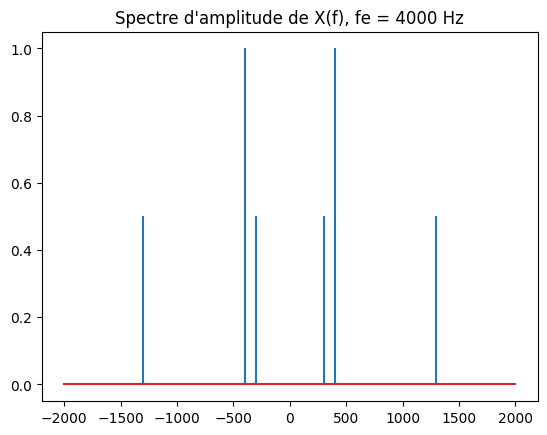

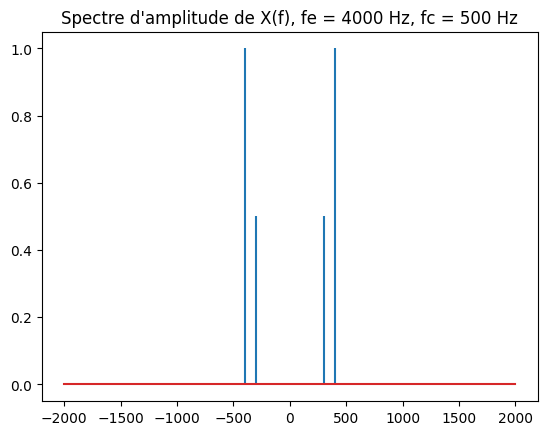

Pics détectés: 
• -400.0 Hz - Amplitude 1.000000000000003
• -300.0 Hz - Amplitude 0.5000000000000021
• 300.0 Hz - Amplitude 0.5000000000000021
• 400.0 Hz - Amplitude 1.000000000000003


In [12]:
# A COMPLETER
# Mêmes opérations mais avec fe = 4kHz et fc = 500 Hz

fe = 4000
fc = 500

T = 1
parameters_x = [[300,1,-np.pi/2],
                [400,1,-np.pi/2],
                [1300,1,-np.pi/2],
                [3600,1,-np.pi/2]]

t,x = somme_sinus(parameters_x, T, fe)

# Affichage du signal
plt.figure()
plt.plot(t, x)
plt.title("Signal x(t)")
plt.tight_layout()
plt.show()

# Transformée de Fourier de x(t) et affichage du spectre d'amplitude
X = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(len(x),1/fe))
amp = np.abs(X)*1/len(x)

plt.stem(f, amp, markerfmt=' ')
plt.title(f"Spectre d'amplitude de X(f), fe = {fe} Hz")
plt.show()

# Filtre passe-bas idéal appliqué à x(t), affichage du spectre d'amplitude modifié et détection des pics (fréquence, amplitude)
X[np.abs(f)>fc]=0

amp = np.abs(X)*1/len(x)
plt.stem(f, amp, markerfmt=' ')
plt.title(f"Spectre d'amplitude de X(f), fe = {fe} Hz, fc = {fc} Hz")
plt.show()

peaks, properties = find_peaks(amp, height=np.max(amp)*0.01)
print(f'Pics détectés: ')
for peak, height in zip(peaks, properties['peak_heights']):
    print(f"• {f[peak]} Hz - Amplitude {height}")

**_QUESTION :_** Obtenez-vous le même résultat que ce que vous aviez trouvé en théorie ? Sinon pourquoi ?

*Indice : est-ce qu'on a calculé la même transformée de Fourier entre l'exercice TD et ici ?*

**_REPONSE :_** Le dernier cas ($f_e$ = 4kHz, $f_c$ = 500 Hz) donne le même résultat que la théorie. En revanche, le cas précédent ($f_e$ = 2kHz, $f_c$ = 1500 Hz) nous donne un résultat très proche, mais avec deux pics normalement attendus en moins à -1300 et 1300 Hz. Cela s'explique par la TF employée ici. Dans le cas théorique, nous avions fait une transformée de Fourier à temps discret (TFTD), qui calcule le spectre d'amplitude dans une plage de fréquence infinie. En pratique, Nous avons fait une transformée de Fourier discrète (TFD) qui elle calcule le spectre d'amplitude dans une plage de fréquence de $-\frac{f_e}{2}$ à $\frac{f_e}{2}$. Ici, les fréquences de -1300 et 1300 Hz théoriques ne rentrent pas dans la plage de fréquence, ce qui fait qu'ils ne sont pas visibles.

Pour faire le lien avec la théorie, le filtre passe-bas anti-repliement doit en théorie garantir la condition de Shannon, donc $f_c < \frac{f_e}{2}$. Ici, ce n'est pas le cas, ce qui explique cette différence. Donc, au final, dans le deuxième cas, le filtre anti-repliement ne sert à rien.

---

## Exercice 3 : Quantification

On va maintenant passer à la quantification d'un signal. Elle permet de discrétiser l'amplitude d'un signal (dans la même idée que l'échantillonnage discrétise le temps), afin de numériser un signal analogique. Plus concrètement, dans nos exemples précédents (les sinusoïdes), les valeurs sont des float, pouvant ainsi une très grande quantité de valeurs possibles. Cependant, dans un contexte physique, on ne peut stocker des valeurs floatantes, mais uniquement des entiers, qui plus est avec un nombre de bits précis (8, 16, 32, etc.), ce qui limite grandement le nombre de valeurs possibles. De plus, dans un contexte numérique, un signal floatant prend beaucoup plus de mémoire qu'un signal entier. L'objectif de la quantification est donc de représenter numériquement un signal analogique en minimisant la perte d’information pour un nombre de bits donné.

Dans un premier temps, construisez le signal $a(t)$ et affichez-le :

\begin{equation*}
    a(t) = 2 \cdot sin(2 \pi f_0 t - \frac{\pi}{2}) + sin(2 \pi f_1 t + \frac{\pi}{3})
\end{equation*}

Avec $f_0 = 5 Hz$, $f_1 = 20 Hz$. Le signal évoluera durant 5 secondes, avec une fréquence d'échantillonnage $f_e$ = 44100 Hz.

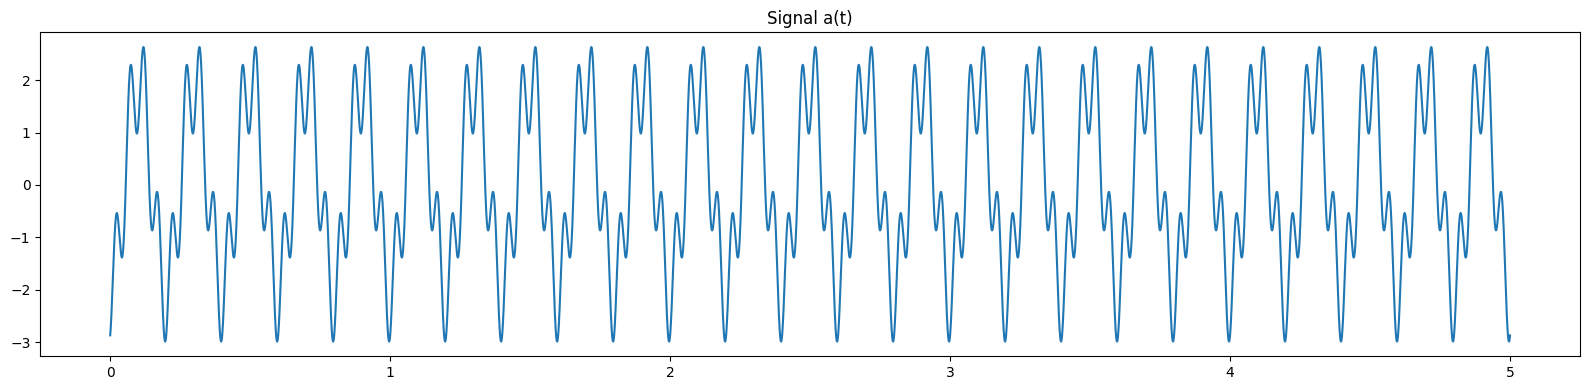

In [13]:
# A COMPLETER
# Création et affichage de a(t)

parameters_a = [[5, 2, -np.pi/2],
                [20, 1, -np.pi/3]]

t,a = somme_sinus(parameters_a, 5, 44100)

# Affichage du signal
plt.figure(figsize=(16,4))
plt.plot(t, a)
plt.title("Signal a(t)")
plt.tight_layout()
plt.show()

La première étape de la quantification est tout simplement... la normalisation. En effet, il faut que notre signal soit contenu entre -1 et 1 en amplitude. Ici, nous n'avons pas de contexte nous disant quelle est l'amplitude maximum possible. On va donc tout simplement normaliser en divisant notre signal par l'amplitude maximum trouvée. A vous de jouer !

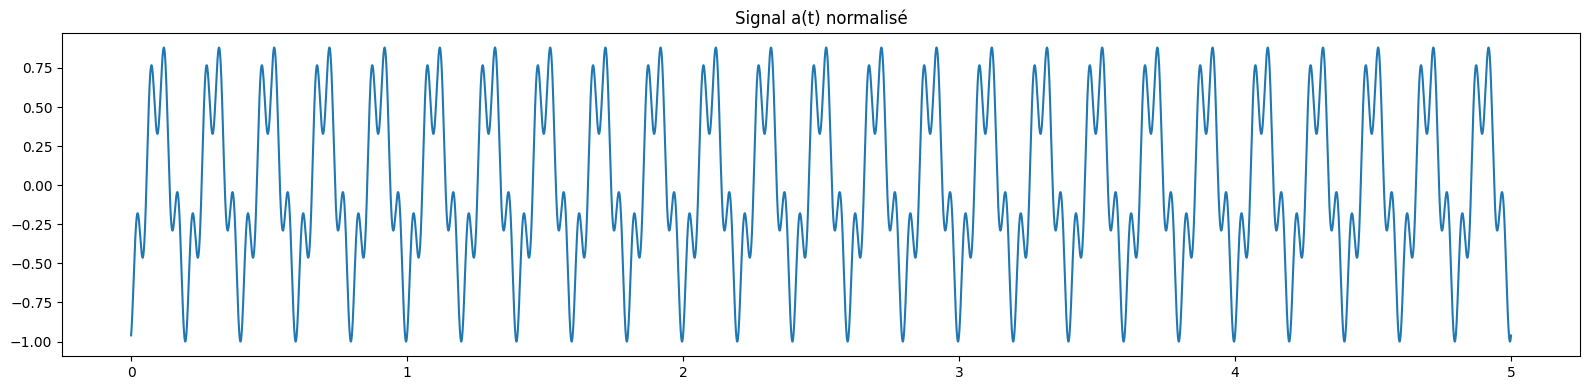

In [14]:
# A COMPLETER
# Normalisation de a(t) et affichage

amplitude_max_a = np.max(np.abs(a))
a_norm = a/amplitude_max_a

# Affichage du signal normalisé
plt.figure(figsize=(16,4))
plt.plot(t, a_norm)
plt.title("Signal a(t) normalisé")
plt.tight_layout()
plt.show()

On va dans un premier temps faire une quantification 8 bits signé. Cela veut dire que toutes les valeurs de notre signal, comprises initialement entre -1 et 1, seront par la suite codées sur 8 bits, tout en conservant leurs signes initiaux.

**_QUESTION :_** Quelle est la plage de valeurs possibles pour un entier codé sur 8 bits ?

**_REPONSE :_** Les entiers 8 bits signés sont compris entre -128 et 127.

Quantifiez maintenant votre signal normalisé en 8 bits. Les valeurs d'amplitude du signal doivent être entières et comprises dans la plage de valeurs possibles définis précédemment.

*Note : Quitte à ne pas exploiter l'entièreté de la plage, on préferera toujours garder les valeurs nulles du signal d'origine à 0*

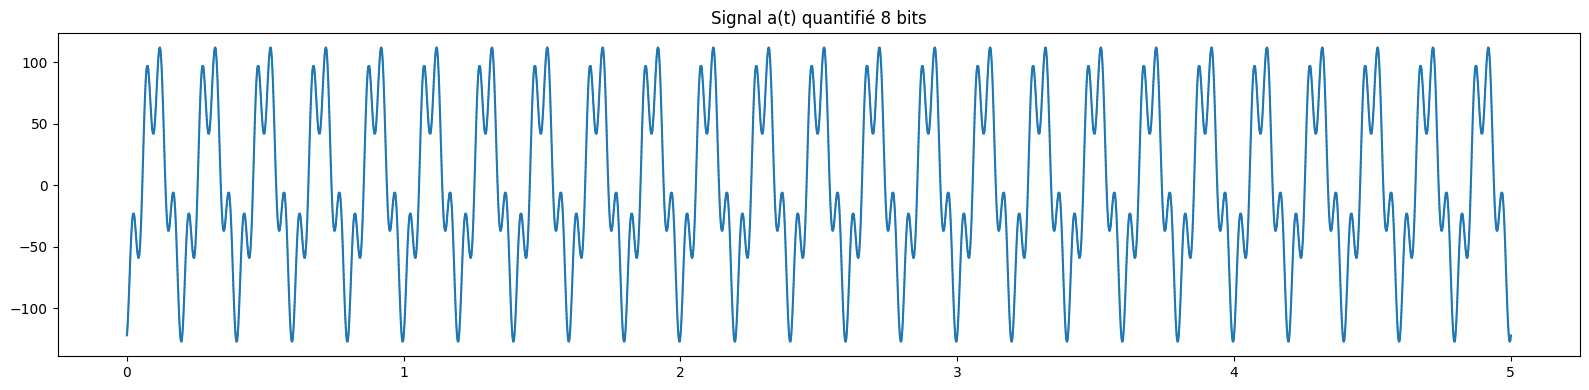

In [15]:
# A COMPLETER
# Quantification du signal normalisé en 8 bits et affichage du signal quantifié
a_quant_8_bit = np.round(a_norm*127).astype(np.int8)

# Affichage du signal quantifié
plt.figure(figsize=(16,4))
plt.plot(t, a_quant_8_bit)
plt.title("Signal a(t) quantifié 8 bits")
plt.tight_layout()
plt.show()

Effectuez maintenant les étapes inverses à partir du signal quantifié pour retrouver un signal dans la même plage de valeurs que le signal original, et affichez les deux signaux sur la même figure.

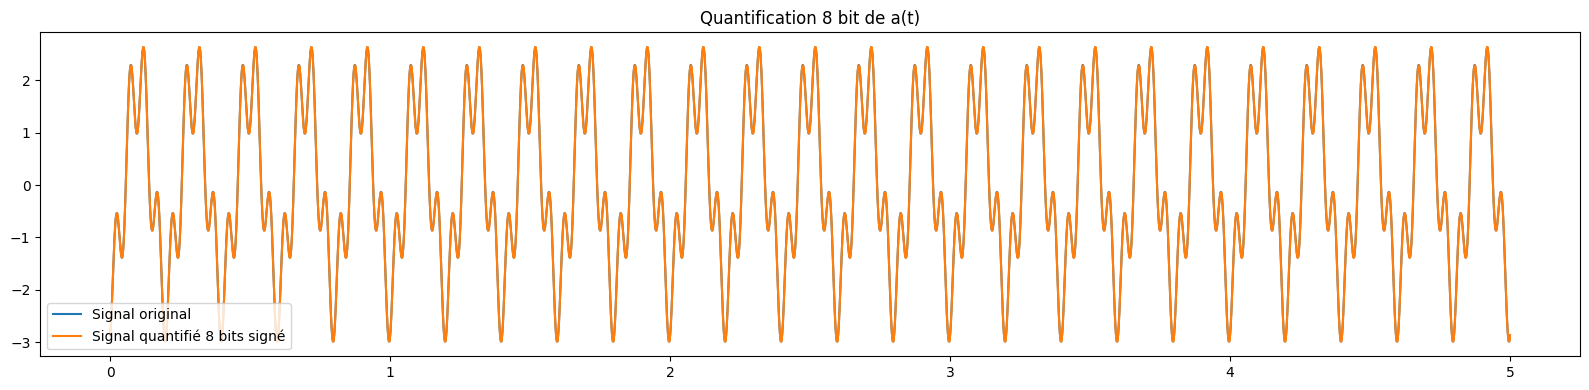

In [16]:
# A COMPLETER
# Modification du signal quantifié pour le comparer au signal d'origine
a_prime = (a_quant_8_bit/127)*amplitude_max_a

# Affichage du signal d'origine et du signal quantifié
plt.figure(figsize=(16,4))
plt.plot(t, a, label='Signal original')
plt.plot(t, a_prime, label='Signal quantifié 8 bits signé')
plt.title("Quantification 8 bit de a(t)")
plt.legend()
plt.tight_layout()
plt.show()

A vu d'oeil, on ne remarque quasi aucune différence entre les deux signaux. Cependant, vous pouvez constater avec la fonction *np.unique* qu'il y a une différence significative dans le nombre de valeurs utilisées pour représenter les deux signaux

In [17]:
# A COMPLETER
# Calcul du nombre de valeurs "uniques" des signaux
print(f"Nombres de valeurs d'amplitudes uniques de a(t) : {len(np.unique(a))}")
print(f"Nombres de valeurs d'amplitudes uniques de a(t) quantifié 8 bits : {len(np.unique(a_prime))}")

Nombres de valeurs d'amplitudes uniques de a(t) : 206400
Nombres de valeurs d'amplitudes uniques de a(t) quantifié 8 bits : 240


Pour une meilleure comparaison entre les deux signaux, on va désormais calculer le rapport Signal sur Bruit (comme vu durant le TP3, partie 2). Ici, le bruit correspond à la différence entre le signal original et le signal quantifié.

In [18]:
# A COMPLETER
# Calcul du rapport signal sur bruit entre les deux signaux
def rapport_sb(signal,signal_compresse):
    return 10 * np.log10(np.sum(signal.astype(float)**2) / np.sum((signal.astype(float) - signal_compresse.astype(float))**2))

print(f"Rapport S/B de la quantification 8 bits : {rapport_sb(a,a_prime)} dB")

Rapport S/B de la quantification 8 bits : 47.38869816491939 dB


Développez maintenant une fonction générique qui quantifie un signal en $N$ bits, indiqué en paramètre en entrée. L'amplitude maximum possible du signal d'entrée sera aussi indiqué en paramètre de fonction. Appliquez votre fonction sur le signal a pour une quantification 4-bits.

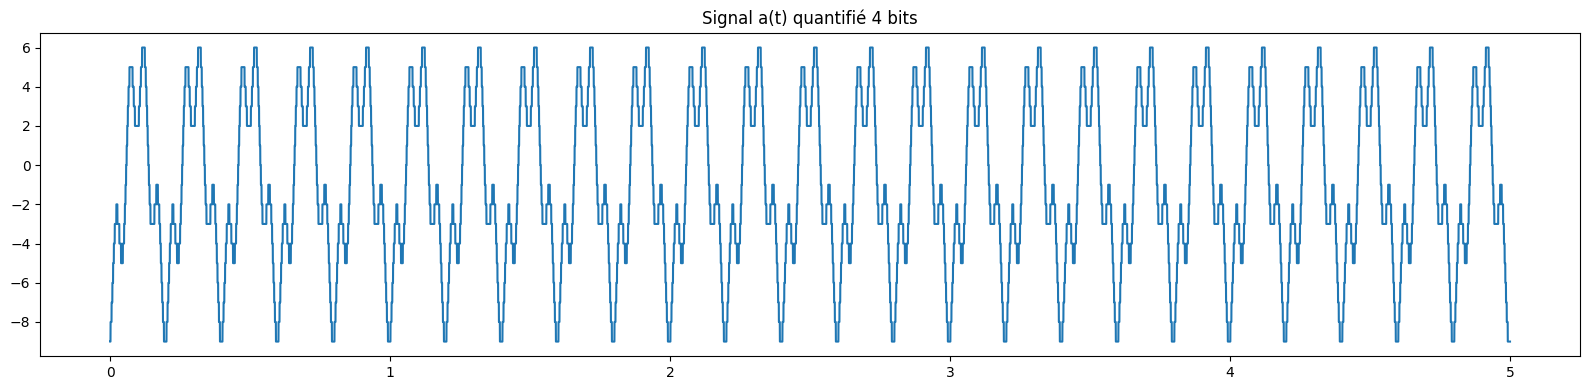

In [19]:
# A COMPLETER
# Fonction de quantification N bits
def quantify(signal, N, amp_max):
    """
    Quantifie un signal d'entrée en N bits
    signal : tableau 1D NumPy, signal à quantifier
    N : entier, nombre de bits pour quantification
    amp_max : float, amplitude maximale possible du signal d'entrée
    """

    # Normalisation du signal d'entrée
    signal_norm = np.clip(signal/amp_max,-1,1) # Avec np.clip, on replace les valeurs entre -1 et 1 en définissant le min à -1 et le max à 1

    # Quantification n bits signée
    # On cast en int64 (entier codé sur 64 bits) par défaut, mais on pourrait trouver un type de données moins gourmand en fonction de N
    signal_quant = np.round(signal_norm * 2**(N-1)-1).astype(np.int64)

    return signal_quant

# Quantification de a(t) en 4 bits
a_quant_4_bit = quantify(a,4,amplitude_max_a)

# Affichage du signal a(t) quantifié 4-bits
plt.figure(figsize=(16,4))
plt.plot(t, a_quant_4_bit)
plt.title("Signal a(t) quantifié 4 bits")
plt.tight_layout()
plt.show()

De la même manière que précédemment, développez une fonction de "dé-quantification", pour transformer le signal quantifié afin de le replacer dans la même plage que le signal d'origine.

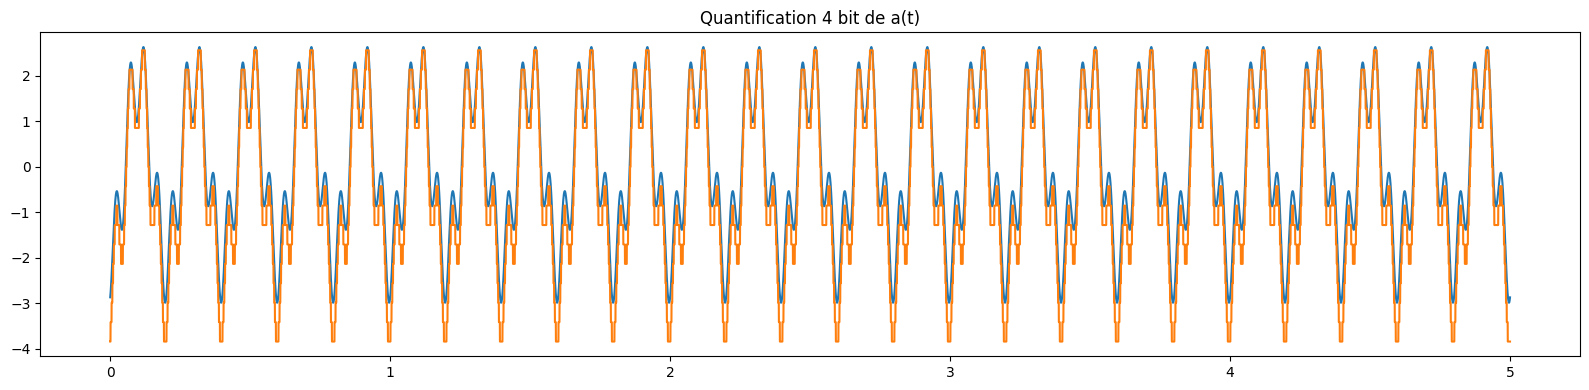

In [20]:
# A COMPLETER
# Fonction de déquantification du signal
def unquantify(signal_quant, N, amp_max):
    """
    Quantifie un signal d'entrée en N bits
    signal_quant : tableau 1D NumPy, signal à quantifier
    N : entier, nombre de bits pour quantification
    amp_max : float, amplitude maximale possible du signal d'entrée
    """
    signal_dequant = (signal_quant/(2**(N-1)-1))*amp_max
    return signal_dequant

# Dé-quantification de a(t) 4 bits
a_dequant_4_bit = unquantify(a_quant_4_bit,4,amplitude_max_a)

# Affichage du signal a(t) déquantifié 4-bits et du signal d'origine
plt.figure(figsize=(16,4))
plt.plot(t, a, label='Signal original')
plt.plot(t, a_dequant_4_bit, label='Signal quantifié 4 bits signé')
plt.title("Quantification 4 bit de a(t)")
plt.tight_layout()
plt.show()

Calculez le rapport signal sur bruit du signal a(t) quantifié à différents N (variant de 2 à 16 bits) et tracez la courbe. 

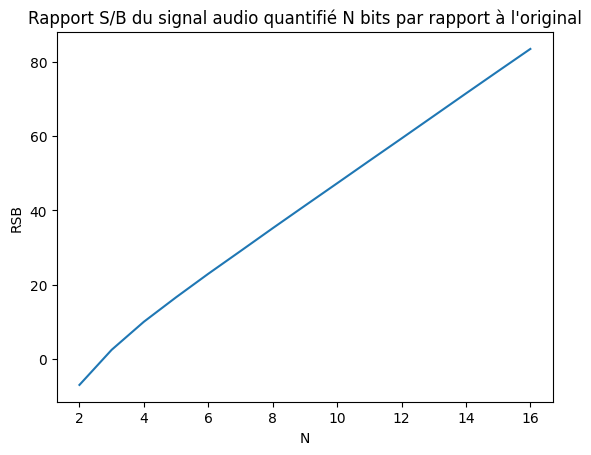

In [21]:
# A COMPLETER
# Quantification N bits de a(t) et affichage du rapport signal sur bruit en fonction de N

amplitude_max_a = np.max(np.abs(a))
N_values = list(range(2,17))
RSB_values = []
for N in N_values:
    a_quant_N_bits = quantify(a, N, amplitude_max_a)
    a_dequant_N_bits = unquantify(a_quant_N_bits, N, amplitude_max_a)
    RSB_values.append(rapport_sb(a,a_dequant_N_bits))

plt.figure()
plt.plot(N_values,RSB_values)
plt.title("Rapport S/B du signal audio quantifié N bits par rapport à l'original")
plt.xlabel("N")
plt.ylabel("RSB")
plt.show()

---

## Exercice 4 : Ca donne quoi sur l'audio ?

Pour finir ce TP, on va juste expérimenter les effets de l'échantillonnage et de la quantification sur un audio. Pour cela, vous avez deux audios WAV de haute qualité (24 bits signés, +80kHz). Votre objectif va être de modifier l'échantillonnage et la quantification de l'audio, et ainsi comparer le signal original et celui "réduit" de trois façons :
- Comparaison numérique (calcul rapport S/B)
- Comparaison qualitative (écoute de l'audio)
- Comparaison de mémoire (taille en octet des audios)

Les différents échantillonnages/quantifications à votre disposition pour le WAV :
- Quantification : 8-bits non signé, 16 bits signé
- Echantillonnage : 8kHz, 16 kHz, 32 kHz, 48 kHz

*Attention, le format 8-bits signé n'a pas la même plage de valeurs que le format 8-bits non signé*

Pour le ré-échantillonnage, je vous conseille d'utiliser la fonction *scipy.signal.resample*. Pour la quantification, utilisez votre fonction précédemment développée, avec peut-être quelques modifications.

A vous de jouer, et bon courage !

*Note 1 : la qualité auditive dépend énormément de votre matériel (carte son, casque audio/écouteurs). Il est donc normal de ne pas percevoir de différences entre certaines versions que vous allez créer*

*Note 2 : l'exercice n'est pas obligatoire (comme tous les autres en réalité). Cependant, je vous invite si vous n'avez pas le temps de coder à tester l'impact de l'échantillonnage et de la quantification grâce à Audacity. C'est très simple à utiliser, et vous pouvez faire la partie analyse de l'exercice. De plus, le logiciel est gratuit, open-source et multi-plateforme*

In [22]:
# A COMPLETER
# Lecture de l'audio, et affichage de la fréquence d'échantillonnage et de la profondeur de quantification
...

Ellipsis

In [23]:
# A COMPLETER
# Ré-échantillonnage et quantification de l'audio HQ, et enregistrement dans différents fichiers WAV
...

Ellipsis

**Analyse de l'impact de l'échantillonnage et de la quantification sur l'audio :**